# Predicting injuries when accident occurs

In [1]:
import pandas as pd

# read data
accidents = pd.read_csv('../data/accidents_bcn_ml.csv')

In [2]:
accidents.dtypes

Codi_districte                 float64
Codi_barri                     float64
Descripcio_causa_vianant        object
Numero_victimes                float64
Numero_vehicles_implicats      float64
Descripcio_causa_mediata        object
Descripcio_victimitzacio        object
Descripcio_tipus_persona        object
Desc_Tipus_vehicle_implicat     object
Descripcio_sexe                 object
Edat                             int64
dtype: object

In [3]:
accidents.drop(columns=['Codi_districte','Codi_barri'], inplace=True)

In [4]:
accidents.Descripcio_victimitzacio.replace({'Ferit greu: hospitalització superior a 24h':5,
       'Ferit lleu: Hospitalització fins a 24h':1,
       "Ferit lleu: Amb assistència sanitària en lloc d'accident":2,
       'Ferit lleu: Rebutja assistència sanitària':3,
       'Mort (dins 24h posteriors accident)':6, 'Ferit lleu':4, 'Ferit greu':5,
       'Mort':6}, inplace=True)

In [5]:
# define X and y (features and target)
X = accidents.drop(columns="Descripcio_victimitzacio")
y = accidents["Descripcio_victimitzacio"]

In [6]:
y.value_counts()

1    20802
4    14523
2     9355
3     1398
5      857
6       82
Name: Descripcio_victimitzacio, dtype: int64

### Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

### Pre-processing numerical features


In [8]:
from sklearn.preprocessing import StandardScaler
#Define columns to use
num_cols = ['Numero_victimes','Numero_vehicles_implicats','Edat']
# Initialize StandardScaler
std_scaler = StandardScaler()

### Pre-processing categorical features

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Define columns to use
ordinal_cols = ['Descripcio_causa_mediata','Descripcio_causa_vianant']
oneHot_cols = ["Descripcio_sexe",'Descripcio_tipus_persona','Desc_Tipus_vehicle_implicat']
categ_cols = ordinal_cols + oneHot_cols
X_cat = X[categ_cols]

# Define categories order for ordinal columns
Descripcio_causa_mediata_cats = ['No hi ha causa mediata','Estat de la senyalització','Factors meteorològics', 'Objectes o animals a la calçada','Calçada en mal estat','Calçada en mal estat','Excés de velocitat o inadequada','Drogues o medicaments','Alcoholèmia']
Descripcio_causa_vianant_cats = ["No és causa del  vianant",'Altres','Desobeir altres senyals', "Transitar a peu per la calçada","Creuar per fora pas de vianants", "Desobeir el senyal del semàfor"]
ord_cats = [Descripcio_causa_mediata_cats, Descripcio_causa_vianant_cats]


# Initialize transformers
ord_enc = OrdinalEncoder(categories=ord_cats)
oneH = OneHotEncoder(handle_unknown="ignore")

# Assemble the "Column Transformer"
categ_encode_pipeline = ColumnTransformer([
    ("ord_encoder_branch", ord_enc, ordinal_cols),
    ("oneH_encoder_branch", oneH, oneHot_cols)
])

In [10]:
# Fit & Transform to training set
categories_encoded = categ_encode_pipeline.fit_transform(X_cat)
col_names_transformed = ordinal_cols + list(categ_encode_pipeline.named_transformers_["oneH_encoder_branch"].get_feature_names())

In [11]:
pd.DataFrame(pd.DataFrame.sparse.from_spmatrix(categories_encoded, columns=col_names_transformed))

,Descripcio_causa_mediata,Descripcio_causa_vianant,x0_Desconegut,x0_Dona,x0_Home,x1_Conductor,x1_Passatger,x1_Vianant,x2_Altres vehicles amb motor,x2_Altres vehicles sense motor,...,x2_Todo terreno,x2_Tot terreny,x2_Tractocamión,x2_Tractor camió,x2_Tranvía o tren,x2_Tren o tramvia,x2_Turisme,x2_Turismo,x2_Veh. mobilitat personal amb motor,x2_Veh. mobilitat personal sense motor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47012,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47013,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47014,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47015,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing pipeline (num+cat)

In [12]:
preproc_pipeline = ColumnTransformer([
    ('std_encoder_branch',std_scaler, num_cols),('categ_preproc', categ_encode_pipeline,categ_cols)
])

## Full pre-processing pipeline

In [13]:
# full_preproc_pipeline = SparseColumnsDropper + intermediate_pipeline + StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

full_preproc_pipeline = Pipeline([
    ("preproc_pipeline", preproc_pipeline),
    ('scaler', StandardScaler(with_mean=False))])

In [14]:
#Preprocessing the data:
X_train_prep = full_preproc_pipeline.fit_transform(X_train,y_train) #We write y_train because of RF_Selector we have to fit it, we're pipeline all the same time, not step by step

In [15]:
X_test_prep = full_preproc_pipeline.transform(X_test)

## Initial exploration models

In [16]:
import time
# Import necessary features
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# simple models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# ensemble models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:

# initialize all models
logistic_regression = LogisticRegression()
stoc_grad_desc = SGDClassifier()
k_near_neigh = KNeighborsClassifier()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier()
bagging = BaggingClassifier()
extra_trees = ExtraTreesClassifier()
gradient_boost = GradientBoostingClassifier()
random_forest = RandomForestClassifier()

models = [logistic_regression,stoc_grad_desc, k_near_neigh, naive_bayes,
          decision_tree, ada_boost, bagging, extra_trees, gradient_boost, random_forest]
names_models = ['Logistic Regression', 'Stochastic Gradient Descent', 'K-Nearest Neighbors', 
                'Naive-Bayes', 'Decision Tree', 'ADA Boost', 'Bagging Classifier', 'Extra Trees', 'Gradient Boost', 
                'Random Forest']

In [18]:
# create an empty dataframe
all_models_results = pd.DataFrame(columns = ['test_accuracy', 'test_precision_macro', 'test_recall_macro', 
                                             'test_f1_macro', 'test_roc_auc_ovo', 'model', 'time_to_train_sec'])

# loop that cross_validates all above models for several metrics
for name, model in zip(names_models, models):
    start = time.time()
    if name in ['Stochastic Gradient Descent']:
         results = cross_validate(model, X_train_prep, y_train, scoring = ('accuracy', 'precision_macro', 
                                                     'recall_macro', 'f1_macro')) # SGD computes an error when calculating its AUC
    else:
        results = cross_validate(model, X_train_prep, y_train, scoring = ('accuracy', 'precision_macro', 
                                                     'recall_macro', 'f1_macro', 'roc_auc_ovo'))
    for key in ['fit_time','score_time']:
        del results[key]
    for key in results.keys():
        results[key] = results[key].mean()
    results_model = pd.DataFrame(results, index = range(1))
    results_model['model'] = name
    elapsed_time = time.time()-start
    results_model['time_to_train_sec'] = str(int(elapsed_time))
    all_models_results = pd.concat([all_models_results, results_model], ignore_index=True)
    

C:\Users\Espadas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Espadas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Espadas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [19]:
all_models_results = all_models_results.sort_values('test_f1_macro', ascending=False)
all_models_results = all_models_results[['model', 'test_accuracy', 'test_precision_macro', 'test_recall_macro',
       'test_f1_macro', 'test_roc_auc_ovo']]
all_models_results = all_models_results.reset_index(drop=True)
all_models_results

,model,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc_ovo
0,Decision Tree,0.473827,0.269204,0.231672,0.234305,0.557733
1,Bagging Classifier,0.471937,0.271215,0.227763,0.231237,0.585910
2,Extra Trees,0.478530,0.274253,0.228559,0.231232,0.586707
3,Random Forest,0.473331,0.256377,0.224769,0.226093,0.607125
4,K-Nearest Neighbors,0.470377,0.264826,0.216363,0.214900,0.582752
5,Gradient Boost,0.517760,0.477850,0.224129,0.201125,0.683083
6,Stochastic Gradient Descent,0.485029,0.240566,0.208135,0.190371,NaN
7,Logistic Regression,0.516058,0.300415,0.209485,0.178295,0.659992
8,ADA Boost,0.505447,0.290497,0.213001,0.176037,0.629449
9,Naive-Bayes,NaN,NaN,NaN,NaN,NaN


### Random Forest

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [31]:
#specify the parameters to be tested
n_est = [10, 50, 100, 200]
max_depth_opt = [5, 10, 25, 50]
param_grid = dict(n_estimators = n_est, max_depth=max_depth_opt)

rf_search = RandomizedSearchCV(random_forest,
                                   param_grid,
                                   scoring="f1_macro",
                                   cv = StratifiedKFold(),
                                   n_jobs=-1)
rf_search

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 25, 50],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=123, scoring='f1_macro')

In [21]:

from sklearn.model_selection import StratifiedKFold

#perform the GridSearchCV
start = time.time()
rd_grid = GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_grid={'max_depth': [5, 10, 25, 50],
                                        'n_estimators': [10, 50, 100, 200]},
                    scoring='f1_macro').fit(X_train_prep, y_train)
elapsed_time = time.time()-start
print("Finished iterating in: {} seconds".format(str(int(elapsed_time))))
print(rd_grid.best_score_, rd_grid.best_params_)

Finished iterating in: 227 seconds
0.22750561168774874 {'max_depth': 50, 'n_estimators': 10}


In [22]:
bestRF = RandomForestClassifier(max_depth= 25, n_estimators= 50)

In [23]:
bestRF.fit(X_train_prep, y_train)

RandomForestClassifier(max_depth=25, n_estimators=50)

In [24]:
predictions_RF = bestRF.predict(X_test_prep)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_RF)
cm


array([[1661,  163,   15,  235,    6,    0],
       [ 700,  125,   19,   87,    4,    1],
       [ 102,   22,    3,   12,    1,    0],
       [ 862,   53,    6,  527,    3,    1],
       [  69,    2,    0,   14,    0,    1],
       [   5,    2,    0,    1,    0,    0]], dtype=int64)

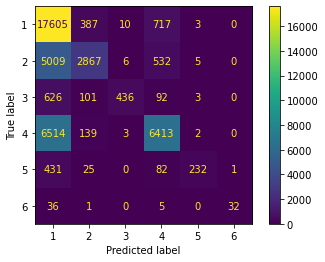

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bestRF, X_train_prep, y_train)

### Logistic Regression

In [ ]:
#specify the parameters to be tested
penalty = ['l1', 'l2', 'elasticnet', 'None']
class_weight=['balanced','None']
max_iter= [400]
random_state = [42]
multi_class=['auto', 'ovr','multinomial']
param_grid = dict(penalty=penalty, class_weight=class_weight, max_iter=max_iter,random_state=random_state,multi_class=multi_class)


#perform the GridSearchCV
start = time.time()
lr_grid = GridSearchCV(logistic_regression, param_grid, cv = 10, scoring='f1_macro', n_jobs=-1).fit(X_train_prep, y_train)
elapsed_time = time.time()-start
print("Finished iterating in: {} seconds".format(str(int(elapsed_time))))
print(lr_grid.best_score_, lr_grid.best_params_)

In [ ]:
bestlr = LogisticRegression(class_weight= 'None', max_iter= 400, multi_class= 'ovr', penalty= 'l2', random_state= 42)

In [ ]:
bestlr.fit(X_train_prep, y_train)

In [ ]:
predictions_lr = bestlr.predict(X_test_prep)

In [ ]:
print("Accuracy:",accuracy_score(y_test, predictions_lr))

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test, predictions_lr, average="macro")

In [ ]:
recall

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, predictions_lr)
cm